In [12]:
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
customers = pd.read_csv("customer_profiles.csv")
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


In [3]:
#WRANGLING THE DATASET 
# I will be changing Male to the number 1 and female to the number 2 and Other to 3 | Done
# I will remove ID since it doesn't have any real relevance to what we are trying to do | Done
# I may remove home state or I might just assign numbers to the different states as well depending on how many there are | Done
# I will also change the ever_married to column to 1 for yes and 2 for no similar to gender | Done

In [4]:
# Wrangling Gender 
gender_map = {'M': 1, 'F': 2, 'O': 3}

# Loop in each row and change the lettered genders to nummbers as designated above
for index, row in customers.iterrows():
    gender_value = gender_map.get(row['gender'], row['gender'])
    customers.at[index, 'gender'] = int(gender_value)

# Cast to integers
customers['gender'] = customers['gender'].astype(int)

In [5]:
customers_w = customers.drop(['home_state', 'id'], axis=1)

In [6]:
customers_w['ever_married'].unique()

# Wrangling Marriage 
gender_map = {'Yes': 1, 'No': 2}

for index, row in customers_w.iterrows():
    married = gender_map.get(row['ever_married'], row['ever_married'])
    customers_w.at[index, 'ever_married'] = int(married)

# Cast to integers
customers_w['ever_married'] = customers_w['ever_married'].astype(int)

In [7]:
customers_w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  int32  
 1   age                                14825 non-null  int64  
 2   became_member_on (year month day)  14825 non-null  int64  
 3   income                             14825 non-null  float64
 4   ever_married                       14825 non-null  int32  
 5   kids                               14825 non-null  int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 579.2 KB


In [8]:
#DATA is now wrangled and I will be working with customers_w to make the K means clustering 

In [9]:
scaler = StandardScaler()
scaled_customers_w = pd.DataFrame(scaler.fit_transform(customers_w))

inertias = []
for cluster in range(1,20): 
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_customers_w)
    inertias.append(kmeans.inertia_)

<AxesSubplot:xlabel='Clusters', ylabel='Inertias'>

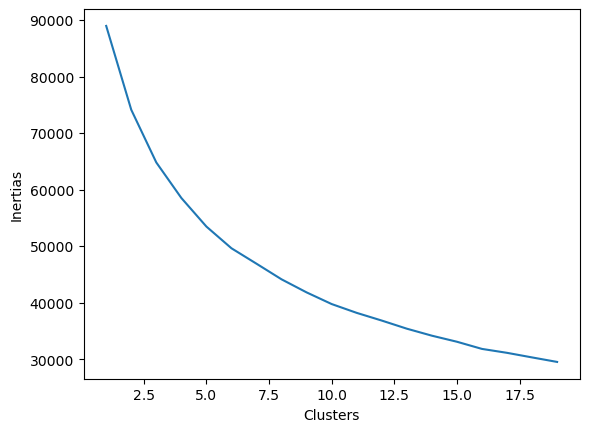

In [13]:
frame = pd.DataFrame({"Clusters":  range(1,20), "Inertias": inertias})
sns.lineplot(data=frame, x='Clusters', y='Inertias')